***purpose of this file was to test feature selection shapes to verify if
model performance could be improved if only more relevant features were used***

In [20]:
#IMPORT
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#feature selection and machine learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#balancing data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


#machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
#PATH TO THE FILE
path = 'churn.csv'

#LOAD DATA
data = pd.read_csv(path)
data.drop('Surname',axis=1,inplace=True)
data.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#drop_columns1 - RowNumber,Gender,HasCrCard
data1 = data.copy()

#drop_column2 = RowNumber,Gender,HasCrCard,Tenure,IsActiveMember,Geography
data2 = data.copy()

In [7]:
#binarizing categorical features

LE = LabelEncoder()

#METHOD FIT_TRANSFORM TO BINARIZING
data['Gender'] = LE.fit_transform(data['Gender'])
data['Geography'] = LE.fit_transform(data['Geography'])

x = data.drop('Exited',axis=1)
y = data.Exited

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int32  
 4   Gender           10000 non-null  int32  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(9)
memory usage: 937.6 KB


In [9]:
#feature selection

In [14]:
#model definition
model = RandomForestClassifier(criterion='entropy',max_features= 'auto',n_estimators= 300)

model.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [15]:
feature_importances = pd.DataFrame(model.feature_importances_, index =x.columns, columns =['importance'] ).sort_values('importance',ascending=False)

<AxesSubplot:>

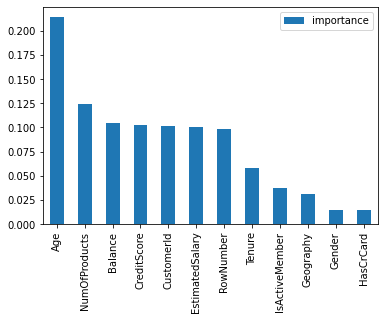

In [13]:
feature_importances.plot(kind='bar')

<AxesSubplot:>

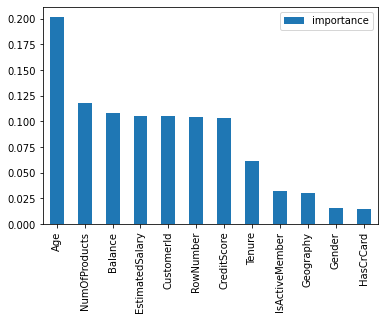

In [16]:
feature_importances.plot(kind='bar')

In [17]:
#data1 - RowNumber,Gender,HasCrCard
#data2 = RowNumber,Gender,HasCrCard,Tenure,IsActiveMember,Geography

In [8]:
#data1 preparation
data1.drop(['RowNumber','Gender','HasCrCard'],axis=1,inplace=True)

#data2 preparation
data2.drop(['RowNumber','Gender','HasCrCard','Tenure','IsActiveMember','Geography'],axis=1,inplace=True)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   EstimatedSalary  10000 non-null  float64
 6   Exited           10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


In [11]:
LE = LabelEncoder()

#METHOD FIT_TRANSFORM TO BINARIZING
data1['Geography'] = LE.fit_transform(data1['Geography'])

x1 = data1.drop('Exited',axis=1)
y1 = data1.Exited

In [12]:
x2 = data2.drop('Exited',axis=1)
y2 = data2.Exited

In [14]:
over_sampling = SMOTE()

#data1
x_dummies1,y_dummies1 = over_sampling.fit_resample(x1,y1)

#data2
x_dummies2,y_dummies2 = over_sampling.fit_resample(x2,y2)

In [35]:
score_test1 = cross_val_score(model,x_dummies1,y_dummies1)

score_test2 = cross_val_score(model,x_dummies2,y_dummies2)

In [36]:
print('{} score data1: {}'.format(model, score_test1.mean()))
print('{} score data2: {}'.format(model, score_test2.mean()))

RandomForestClassifier(criterion='entropy', n_estimators=300) score data1: 0.856340130141583
RandomForestClassifier(criterion='entropy', n_estimators=300) score data2: 0.8237489369208497


In [17]:
rus = RandomUnderSampler(random_state=42)

x_under1,y_under1 = rus.fit_resample(x1, y1)

#data2
x_under2,y_under2 = rus.fit_resample(x2, y2)

In [40]:
#the randomforestclassifier was used because it was what performed better with the normal dataset without the feature selection process

score1 = cross_val_score(model,x_under1,y_under1)

score2 = cross_val_score(model,x_under2,y_under2)

In [41]:
print('{} score data1: {}'.format(model, score1.mean()))
print('{} score data2: {}'.format(model, score2.mean()))

RandomForestClassifier(criterion='entropy', n_estimators=300) score data1: 0.7702470568728238
RandomForestClassifier(criterion='entropy', n_estimators=300) score data2: 0.7459468503640283


In [ ]:
#result with no feature selection  - 0.85
#result with feature selection method1 - 0.77
#result with feature selection method2 - 0.74

***combination of data balancing methods to try to improve model performance***

In [15]:
#TRAINING AND TESTING THE MODEL WITH CROSS VALIDATION WITH over_sampling WITH #data1 - RowNumber,Gender,HasCrCard
Models = []
Scores = []
knc = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier()
gs = GaussianNB()
clf = LogisticRegression()
gnb = GaussianNB()
scf = SGDClassifier()
rfc = RandomForestClassifier()

models = [knc,dtc,gs,clf,gnb,scf,rfc]

for model in models:
    score = cross_val_score(model,x_dummies1,y_dummies1)
    print('{} score: {}'.format(model, score.mean()))
    Models.append(model)
    Scores.append(score.mean())

KNeighborsClassifier() score: 0.7154970381604764
DecisionTreeClassifier() score: 0.784757036524591
GaussianNB() score: 0.7082770874538429
LogisticRegression() score: 0.5728373052828258
GaussianNB() score: 0.7082770874538429
SGDClassifier() score: 0.5256789269380068
RandomForestClassifier() score: 0.854393741851369


In [16]:
#TRAINING AND TESTING THE MODEL WITH CROSS VALIDATION 
Models = []
Scores = []
knc = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier()
gs = GaussianNB()
clf = LogisticRegression()
gnb = GaussianNB()
scf = SGDClassifier()
rfc = RandomForestClassifier()

models = [knc,dtc,gs,clf,gnb,scf,rfc]

for model in models:
    score = cross_val_score(model,x_dummies2,y_dummies2)
    print('{} score: {}'.format(model, score.mean()))
    Models.append(model)
    Scores.append(score.mean())

KNeighborsClassifier() score: 0.7099090506838692
DecisionTreeClassifier() score: 0.7501573504963336
GaussianNB() score: 0.7010556782469616
LogisticRegression() score: 0.5738420345684268
GaussianNB() score: 0.7010556782469616
SGDClassifier() score: 0.5025117739403453
RandomForestClassifier() score: 0.8208601012475103


In [18]:
#TRAINING AND TESTING THE MODEL WITH CROSS VALIDATION TO SEE WHICH IS THE BEST ONE
Models = []
Scores = []
knc = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier()
gs = GaussianNB()
clf = LogisticRegression()
gnb = GaussianNB()
scf = SGDClassifier()
rfc = RandomForestClassifier()

models = [knc,dtc,gs,clf,gnb,scf,rfc]

for model in models:
    score = cross_val_score(model,x_under1,y_under1)
    print('{} score: {}'.format(model, score.mean()))
    Models.append(model)
    Scores.append(score.mean())

KNeighborsClassifier() score: 0.519392833994061
DecisionTreeClassifier() score: 0.6961206493721831
GaussianNB() score: 0.6907203690025776
LogisticRegression() score: 0.5697107369500009
GaussianNB() score: 0.6907203690025776
SGDClassifier() score: 0.521840490797546
RandomForestClassifier() score: 0.7717173392020017


In [19]:
#TRAINING AND TESTING THE MODEL WITH CROSS VALIDATION TO SEE WHICH IS THE BEST ONE
Models = []
Scores = []
knc = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier()
gs = GaussianNB()
clf = LogisticRegression()
gnb = GaussianNB()
scf = SGDClassifier()
rfc = RandomForestClassifier()

models = [knc,dtc,gs,clf,gnb,scf,rfc]

for model in models:
    score = cross_val_score(model,x_under2,y_under2)
    print('{} score: {}'.format(model, score.mean()))
    Models.append(model)
    Scores.append(score.mean())

KNeighborsClassifier() score: 0.519392833994061
DecisionTreeClassifier() score: 0.6676444431045658
GaussianNB() score: 0.6880191736633454
LogisticRegression() score: 0.5697107369500009
GaussianNB() score: 0.6880191736633454
SGDClassifier() score: 0.5134969325153375
RandomForestClassifier() score: 0.7429996533064018
